# TASK 1 : TITANIC SURVIVAL PREDICTION
Author: Alladoum Ndoubayo 
Field: Data Science 
Purpose: Is to build a model that predicts if a passenger on the Titanic survived or not 
Bash: July

In [1]:
 #IMPORTING LIBRARY IN JUPYTER NOTEBOOK ENVIRONMENT

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# IMPORTING DATASET

In [10]:
 
    dataset = pd.read_csv("C:/Users/hp/Desktop/CODSOFT INTERNSHIP/Titanic-Dataset.xls", encoding="latin-1")

In [11]:
# Check the Header
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Check the taill
dataset.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
dataset.shape

(891, 12)

In [14]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above, its clear that we have missing values in age column, so I will drop axis=0

In [16]:
dataset = dataset.dropna(axis=0)

In [17]:
dataset.shape

(183, 12)

In [18]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [19]:
dataset["Survived"].value_counts().reset_index()

,index,Survived
0,1,123
1,0,60


In [20]:
dataset["Pclass"].value_counts().reset_index()

,index,Pclass
0,1,158
1,2,15
2,3,10


<AxesSubplot:>

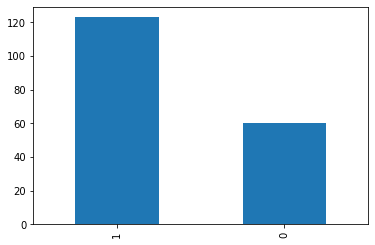

In [21]:
dataset["Survived"].value_counts().plot.bar()

<AxesSubplot:>

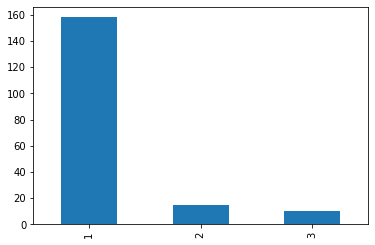

In [22]:
dataset["Pclass"].value_counts().plot.bar()

<AxesSubplot:xlabel='Survived', ylabel='count'>

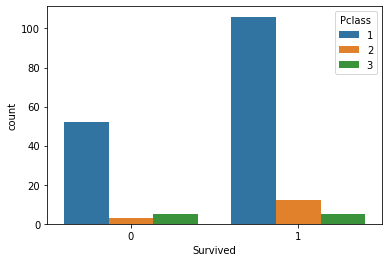

In [23]:
# Now we can visualise the count of survivals with pclass
sns.countplot(x=dataset['Survived'], hue=dataset['Pclass'])

In [24]:
dataset["Sex"]

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 183, dtype: object

<AxesSubplot:xlabel='Sex', ylabel='count'>

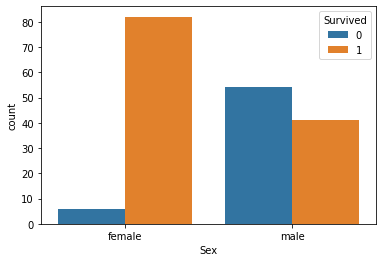

In [25]:
# Look at the count of survivals and gender
sns.countplot(x=dataset['Sex'], hue=dataset['Survived'])

<AxesSubplot:>

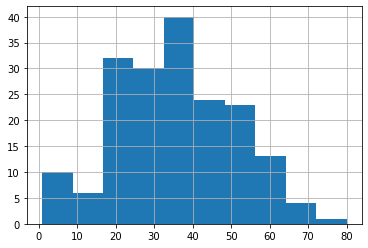

In [26]:
dataset['Age'].hist()

In [27]:
# this is the survival mean by sex
dataset.groupby(['Sex']).mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,461.818182,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900
male,449.389474,0.431579,1.168421,38.451789,0.400000,0.410526,69.124343


In [28]:
dataset['Sex'].unique()

array(['female', 'male'], dtype=object)

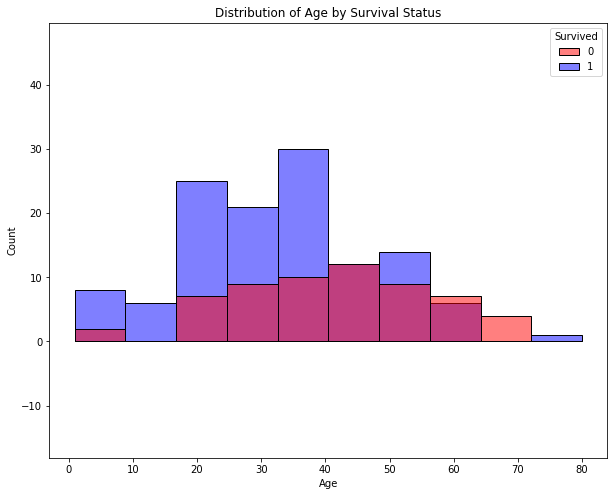

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(data=dataset, x="Age",hue="Survived",palette=["red","blue"])
plt.title('Distribution of Age by Survival Status')
plt.axis("equal")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

dataset['Sex'] = LabelEncoder().fit_transform(dataset['Sex'])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [31]:
dataset['Sex'], dataset['Survived']

(1      0
 3      0
 6      1
 10     0
 11     0
       ..
 871    0
 872    1
 879    0
 887    0
 889    1
 Name: Sex, Length: 183, dtype: int32,
 1      1
 3      1
 6      0
 10     1
 11     1
       ..
 871    1
 872    0
 879    1
 887    1
 889    1
 Name: Survived, Length: 183, dtype: int64)

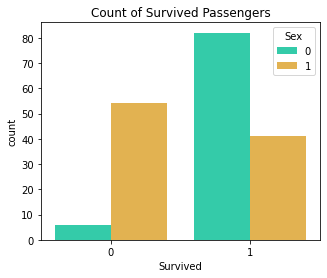

In [32]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Survived", data=dataset, palette="turbo",hue="Sex")
plt.title('Count of Survived Passengers')
plt.show()

In [33]:
survive_gender=dataset[["Survived","Sex"]].value_counts().reset_index()
survive_gender

,Survived,Sex,0
0,1,0,82
1,0,1,54
2,1,1,41
3,0,0,6


In [34]:
em_sex=dataset[["Embarked","Sex"]].value_counts().reset_index()
em_sex

,Embarked,Sex,0
0,S,1,63
1,S,0,53
2,C,0,34
3,C,1,31
4,Q,0,1
5,Q,1,1


In [35]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

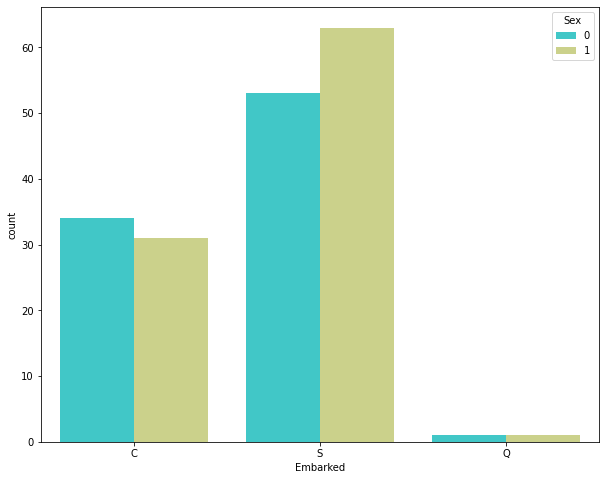

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset,x="Embarked",hue="Sex",palette="rainbow")

plt.show()

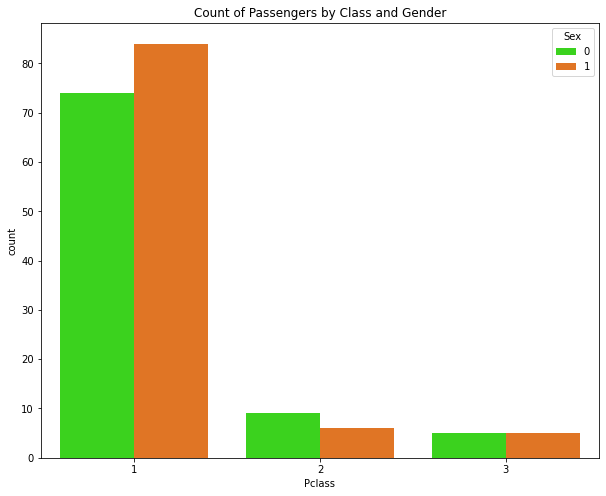

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset,x="Pclass",hue="Sex",palette="gist_ncar")
plt.title('Count of Passengers by Class and Gender')

plt.show()

In [38]:
X = dataset.drop('Age', axis=1) 
Y = dataset['Survived']

In [39]:
dataset_final = dataset
dataset_final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


MODEL TRAINING

In [40]:
X = dataset[["Pclass","Sex"]]
Y = dataset["Survived"]

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log=LogisticRegression(random_state=42)
log_score= cross_val_score(log, X,Y, cv=5)
log.fit(X_train,Y_train)

LogisticRegression(random_state=42)

MODEL PREDICTION

In [44]:
from sklearn.metrics import accuracy_score
Pred = log.predict(X_test)
acc=accuracy_score(Y_test,Pred)
print("Logistic Accuracy:", acc)

Logistic Accuracy: 0.7567567567567568


In [45]:
Pred = print(log.predict(X_test))

[0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1]


In [46]:
print(Y_test)

118    0
251    0
742    1
544    0
712    1
96     0
139    0
337    1
577    1
492    0
487    0
765    1
339    0
835    1
262    0
97     1
291    1
209    1
429    1
307    1
779    1
609    1
707    1
183    1
54     0
618    1
318    1
110    0
717    1
556    1
369    1
305    1
583    0
710    1
332    0
177    0
853    1
Name: Survived, dtype: int64


In [47]:
import warnings
warnings.filterwarnings("ignore")

Prediction = log.predict([[2,0]])

if Prediction==0:
    print("Passenger Did Not Survived")
else:
    print("Passenger Survived")

Passenger Survived


THANKS!!!